## Universidad Politecnica Salesiana 
## Examen
### Nombre: Erika Morocho
### Asignatura: Simulación


**Objetivo:**

    • Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones de eventos.

**Introducción:**

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook)
Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].

**Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:**
   
   1. Obtener datos de tendencia de twitter para ello se puede obtener a través del API 
     
        * Title: Titulo del Post/Twitter
        * Word count: la cantidad de palabras del artículo,
        * numero of Links: los enlaces externos que contiene,
        * numero of comments: cantidad de comentarios,
        * numero Shares: compartidos.
        * HashTag
        
   2. Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
    
       * Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
       * Las personas solo tiene un recinto electoral para realizar el proceso.
       * Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
       * La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
       * Realiza el voto en un tiempo aleatorio de un partido especifico.
       * La persona recibe su certificado votación.


In [1]:
import tweepy
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tweepy as tw
import random 
import pylab as py
import simpy
import numpy as np
import pandas as pd
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline

In [2]:
consumer_key = 'CLxAMh7h8Tqr0H35UUo7V4wDL'
consumer_secret = 'wuIvj5DwQZBYLRAOW3KtJJXOT1WtmoHQmq8KVzyJDk67aB62zH'
access_token = '1330313200114544640-fsKAhyL6g5XVXFb6bfLJtqTGTq4PQy'
access_token_secret = 'TqqaxiUVaUrryaRlJzvhPZawZAgogsIJPFU1eOB57w3G1'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
print(api.me().name) 

Lisseth


In [4]:
Buscar = 'Azuay'

In [5]:
ts = api.search(Buscar, lang="es", count=100, result_type='popular')

In [19]:
df = pd.DataFrame({'Usuario': list(map(lambda twee: twee.author.name , ts)),
                   'Fuente': list(map(lambda twee:twee.source,ts)),
                   'Longitud': list(map(lambda twee: len(twee.text), ts)),
                   'RTs': list(map(lambda twee: twee.retweet_count, ts)),
                   'Likes': list(map(lambda twee: twee.favorite_count, ts)),
                   'seguidores': list(map(lambda twee: twee.author.followers_count, ts)),
                   'Fecha': list(map(lambda twee: twee.created_at, ts))})
df['Fecha'] =pd.to_datetime(df.Fecha)
df.sort_values(by='seguidores') 
df

,Usuario,Fuente,Longitud,RTs,Likes,seguidores,Fecha
0,El Universo,Hootsuite Inc.,139,47,296,2214479,2020-12-20 13:40:03
1,cnegobec,Twitter for Android,127,22,11,244715,2020-12-20 13:50:33
2,El Universo,Hootsuite Inc.,140,23,167,2214479,2020-12-20 17:01:24
3,Movimiento Alianza PAIS,Twitter for iPhone,139,24,26,309652,2020-12-19 21:57:46
4,Policía Ecuador,Twitter for Android,140,8,26,1111892,2020-12-20 23:11:19
5,Andrés Arauz,Twitter for iPhone,140,755,1856,55903,2020-12-16 17:44:42
6,Movimiento Alianza PAIS,Twitter for Android,139,25,29,309652,2020-12-18 22:29:34
7,Andrés Arauz,Twitter for iPhone,140,391,1236,55903,2020-12-18 03:55:04
8,Riesgos Ecuador,Twitter Web App,140,23,11,585984,2020-12-18 21:03:42
9,cnegobec,Twitter for Android,131,80,43,244715,2020-12-16 19:10:21


<AxesSubplot:xlabel='seguidores'>

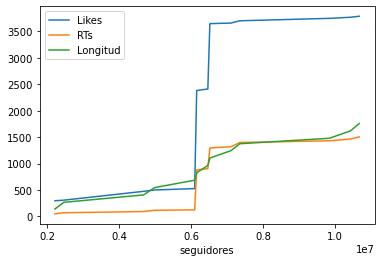

In [7]:
df1 = df.iloc[:, 2:7].cumsum()
df1.plot(x='seguidores', y=['Likes','RTs', 'Longitud'])

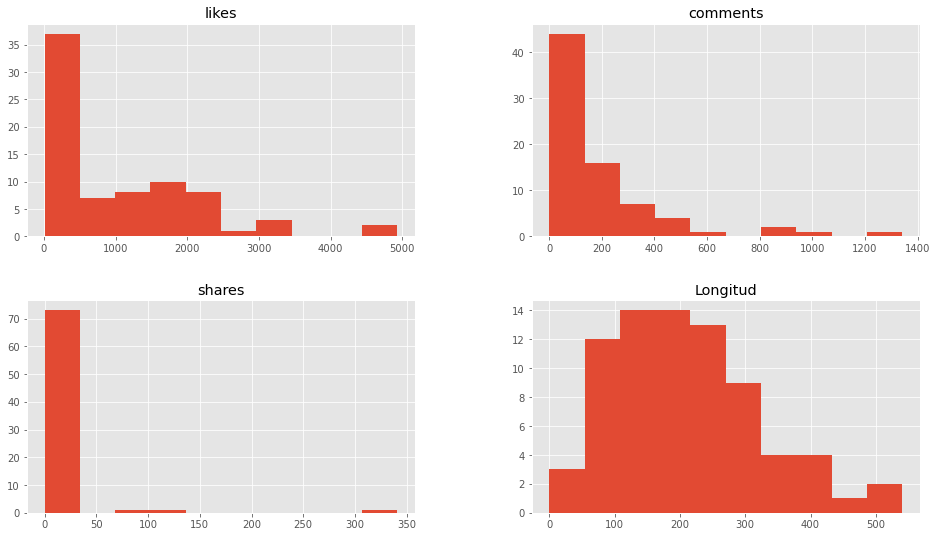

In [92]:
plt.bar(['post_id','post_url', 'time'],1).hist()
plt.show()

#### Metodo de regresion Lineal

In [8]:
df1["sum"] = df1[['Likes','RTs']].sum(axis=1)
df2 = df1.iloc[:, [2,5]]
df2

,Likes,sum
0,296,343
1,307,376
2,474,566
3,500,616
4,526,650
5,2382,3261
6,2411,3315
7,3647,4942
8,3658,4976
9,3701,5099


Ecua: Z= 1.39839329110204 * 236 + -76.51366718030567
Prediccion:  253.5071495197758


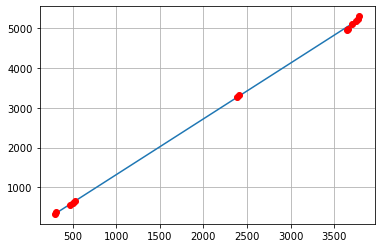

In [9]:
x = list(df2.iloc [:, 0]) # likes
y = list(df2.iloc [:, 1]) # Total

def promedio(x,y): 
    return sum(x) / len(y)

def operacion1(x,y):
    #obtiene x menos el promedio de x
    a = x-np.average(x)
    b = y-np.average(y)
    promxy = sum(a*b)
    promxx = sum(a*a)
    result =promxy/promxx
    return result

def operacion0(x,y):
    res = np.average(y)-operacion1(x,y)*np.average(x)
    return res

z = api.get_user('XimenaPenaP').followers_count


def graficar(x,y,z):
    b1 =operacion1(x,y)
    b0 =operacion0(x,y)
    predecir= b1*z+b0
    puntos_x = np.linspace(x[0],x[-1],6)
    puntos_y = b0+b1*puntos_x
    print("Ecua:", 'Z=',b1,'*',z,'+',b0)
    print('Prediccion: ',predecir)
    plt.plot(puntos_x,puntos_y,)
    plt.plot(x,y,"o", color='red') 
    plt.grid()
if __name__=="__main__":
    graficar(x,y,z)

**Metodo Polinomial**

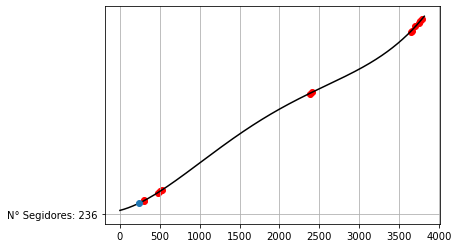

In [56]:

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+30))
prediccion = regresion_lineal.predict(puntos)

def graficar(x,y,z):
    plt.plot(pred_x, prediccion, color='black')
    plt.scatter(x,y,color="red")
    plt.plot(z,prediccion[z], 'o')
    plt.grid()
    plt.plot('N° Segidores: ' + str(z))

if __name__=="__main__":
    graficar(x,y,z)

    


**Eneventos Discretos**

In [165]:
def votacion():
    i=0
    votantes = []
    tiempos_llegada = []
    tiempos_espera = []
    tiempos_votando = []
    tiempos_dando_papeletas =[]
    salida = []
    random.seed(1) 
    numero_votantes_mesa = 350
    lista_total=[['Usuario','Tiempo llegada','Tiempo de espera','Votando.....','Termina de votar']]
    random.seed(1)
    lasso_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    carrasco_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    lasso_win_pct = 69.13
    carrasco_win_pct = 29.28
    number_of_sims = 1000
    total_wards = 0
    total_carrasco_votes = 0
    total_lasso_votes = 0
    total_votes = 0
   
    while(i<numero_votantes_mesa):
            if(i==0):
                votantes.append(i)
                tiempos_llegada.append(i)
                tiempos_espera.append(random.random())
                tiempos_votando.append(random.random())
                tiempos_dando_papeletas.append(i)
                tiempo_salida =tiempos_llegada[i] + tiempos_espera[i] + tiempos_votando[i]
            salida.append(tiempo_salida)
            if(i>=1):
                votantes.append(i)
                tiempos_llegada.append(tiempos_llegada[i-1]+random.random())
                tiempos_espera.append(max(salida[i-1],tiempos_llegada[i])-tiempos_llegada[i])
                tiempos_votando.append(random.random())
                tiempos_dando_papeletas.append(max(salida[i-1],tiempos_llegada[i])-salida[i-1])
                tiempo_salida =tiempos_llegada[i] + tiempos_espera[i] + tiempos_votando[i]
            salida.append(tiempo_salida)
            i=i+1
    i=0
    
    while(i<numero_votantes_mesa):
        lista=[str(votantes[i]).format(2/3),str(tiempos_llegada[i]).format(10/3).format(10/3),str(tiempos_espera[i]).format(10/3),str(tiempos_votando[i]).format(10/3),str(salida[i]).format(10/3)]
        lista_total.append(lista)
        i=i+1
    print(type(lista_total)) 
    data=pd.DataFrame(lista_total)
    print(data)
votacion()

for i in range(number_of_sims):
    my_input = open('shares.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        carrasco_votes_in_ward = 0
        lasso_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= lasso_win_pct:
                lasso_votes_in_ward += 1
                total_lasso_votes += 1
            elif random_num <= (lasso_win_pct + carrasco_win_pct) :
                carrasco_votes_in_ward += 1
                total_carrasco_votes += 1
            total_votes += 1
        carrasco_digit = int(str(carrasco_votes_in_ward)[0])
        lasso_digit = int(str(lasso_votes_in_ward)[0])
        carrasco_digits[carrasco_digit] += 1
        lasso_digits[lasso_digit] += 1
    if i % 100 == 0:
        print('Simulacion con ', i)

carrasco_win_pct = 100.0 * total_carrasco_votes / total_votes
lasso_win_pct = 100.0 * total_lasso_votes / total_votes
print('Guillermo Lazo gana con el:', carrasco_win_pct , '%')
print('Paul Carrasco gana con el:', lasso_win_pct, '%')

<class 'list'>
           0                   1                    2                    3  \
0    Usuario      Tiempo llegada     Tiempo de espera         Votando.....   
1          0                   0  0.13436424411240122   0.8474337369372327   
2          1   0.763774618976614  0.21802336207301987   0.2550690257394217   
3          2   1.259209706068555                  0.0   0.4494910647887381   
4          3   1.910802678791318                  0.0   0.7887233511355132   
..       ...                 ...                  ...                  ...   
346      345   175.5900438595973                  0.0   0.7446142679398566   
347      346  176.27681523615598                  0.0   0.8456227719182262   
348      347  176.93983142465467                  0.0  0.38970192767534384   
349      348   177.5708944483707                  0.0   0.9695948083687032   
350      349  178.21249778139395                  0.0  0.24309173409213014   

                      4  
0      Termina de vota

#### Referencias:

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
* https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
* https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
* http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf

